In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x, t):
    return -x**3 + np.sin(t)

In [3]:
a = 0.0
b = 10.0
N = 1000
h = (b-a)/N
x = 0.0

In [4]:
tpoints = np.arange(a,b,h)
xpoints = []
for t in tpoints:
    xpoints.append(x)
    x +=h*f(x,t)

Text(0, 0.5, 'x(t)')

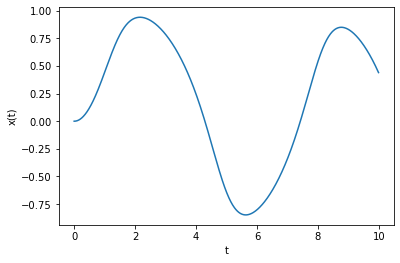

In [5]:
plt.plot(tpoints,xpoints)
plt.xlabel('t')
plt.ylabel('x(t)')

In [6]:
def IntegrateEuler(a, b, N, x = 0.0):
    
    h=(b-a)/N
    
    tpoints = np.arange(a,b,h)
    xpoints = []
    
    for t in tpoints:
        
        xpoints.append(x)
        x +=h*f(x,t)
    
    return tpoints, xpoints

Text(0, 0.5, 'x(t)')

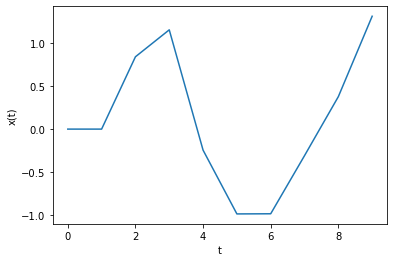

In [7]:
tpoints = []
xpoints = []
tpoints, xpoints = IntegrateEuler(0.0,10.0, N=10)

plt.plot(tpoints,xpoints)
plt.xlabel('t')
plt.ylabel('x(t)')

In [8]:
def IntegrateRungeKutta2(a, b, N, x = 0.0):
    
    h=(b-a)/N
    
    tpoints = np.arange(a,b,h)
    xpoints = []
    
    for t in tpoints:
        
        xpoints.append(x)
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1, t+0.5*h)
        x += k2
    
    return tpoints, xpoints

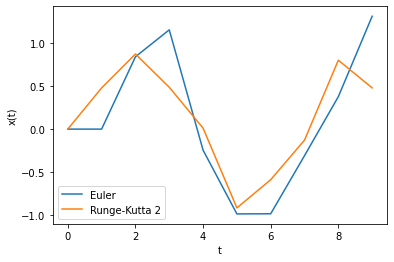

In [9]:
N = 10

tpoint = []
xpoint = []
tpoint, xpoint = IntegrateEuler(0.0, 10.0, N)

tpoint2 = []
xpoint2 = []
tpoints2, xpoints2 = IntegrateRungeKutta2(0.0, 10.0, N)

plt.plot(tpoints,xpoints)
plt.plot(tpoints2, xpoints2)

plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(['Euler','Runge-Kutta 2'])

In [10]:
def IntegrateRungeKutta4(a, b, N, x = 0.0):
    
    h=(b-a)/N
    
    tpoints = np.arange(a,b,h)
    xpoints = []
    
    for t in tpoints:
        
        xpoints.append(x)
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1, t+0.5*h)
        k3 = h*f(x+0.5*k2, t+0.5*h)
        k4 = h*f(x+k3, t+h)
        x += (k1+2*k2+2*k3+k4)/6
    
    return tpoints, xpoints

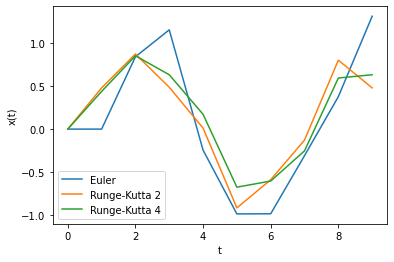

In [11]:
N = 10

tpoint = []
xpoint = []
tpoint, xpoint = IntegrateEuler(0.0, 10.0, N)

tpoint2 = []
xpoint2 = []
tpoints2, xpoints2 = IntegrateRungeKutta2(0.0, 10.0, N)

tpoint3 = []
xpoint3 = []
tpoints3, xpoints3 = IntegrateRungeKutta4(0.0, 10.0, N)

plt.plot(tpoints,xpoints)
plt.plot(tpoints2, xpoints2)
plt.plot(tpoints3, xpoints3)

plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(['Euler','Runge-Kutta 2','Runge-Kutta 4'])

(0.5, 1.0)

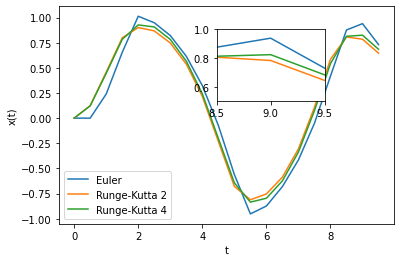

In [12]:
N = 20

tpoints = []
xpoints = []
tpoints, xpoints = IntegrateEuler(0.0, 10.0, N)

tpoint2 = []
xpoint2 = []
tpoints2, xpoints2 = IntegrateRungeKutta2(0.0, 10.0, N)

tpoint3 = []
xpoint3 = []
tpoints3, xpoints3 = IntegrateRungeKutta4(0.0, 10.0, N)

fig, ax1 = plt.subplots()

ax1.plot(tpoints, xpoints)
ax1.plot(tpoints2, xpoints2)
ax1.plot(tpoints3, xpoints3)

plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(['Euler','Runge-Kutta 2','Runge-Kutta 4'])

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.49, 0.55, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.plot(tpoints,xpoints)
ax2.plot(tpoints2, xpoints2)
ax2.plot(tpoints3, xpoints3)
ax2.set_xlim(8.5, 9.5)
ax2.set_ylim(0.50, 1.0)

In [13]:
def NonlinearPendulum(r,t):
    
    g = 9.81
    l = 0.1

    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*np.sin(theta)
    
    return np.array([ftheta, fomega], float)

In [14]:
def IntegrateRungeKutta4Vectorized(a, b, N, xstart):
    
    h=(b-a)/N
    x = xstart
    
    tpoints = np.arange(a,b,h)
    xpoints = np.empty([N,2])
    
    i = 0
    while i < N:
        
        xpoints[i] = x

        k1 = h*NonlinearPendulum(x,t)
        k2 = h*NonlinearPendulum(x+0.5*k1, t+0.5*h)
        k3 = h*NonlinearPendulum(x+0.5*k2, t+0.5*h)
        k4 = h*NonlinearPendulum(x+k3, t+h)
        
        x += (k1+2*k2+2*k3+k4)/6
        i += 1
    
    return tpoints, xpoints

Text(0, 0.5, 'theta(t)')

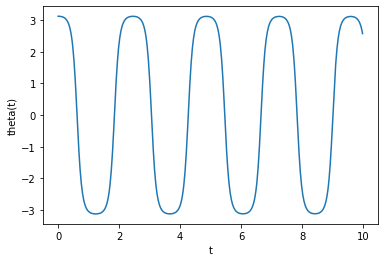

In [15]:
N = 500

tpoints4 = []
xpoints4 = []

theta0 = 179.0/360*2*np.pi ## Degrees to radians
omega0 = 0.0

InitialConditions = [theta0, omega0]

tpoints4, xpoints4 = IntegrateRungeKutta4Vectorized(0.0, 10.0, N, InitialConditions)

fig, ax1 = plt.subplots()

ax1.plot(tpoints4, xpoints4[:,0])

plt.xlabel('t')
plt.ylabel('theta(t)')

In [16]:
from scipy.integrate import odeint

y0 = [179/360*2*np.pi,0]
t = np.linspace(0,10,N)

def PhysicalPendulum(y,t,g,l):
    
    theta = y[0]
    omega = y[1]
    dtheta_dt = omega
    domega_dt = -(g/l)*np.sin(theta) 
    
    return [dtheta_dt,domega_dt]

theta = odeint(PhysicalPendulum, y0, t, args = (g,l))

fig, ax1 = plt.subplots()

ax1.plot(t, theta[:,0])
ax1.plot(tpoints4, xpoints4[:,0])

plt.legend(['SciPy', 'RK4'], loc=1)
plt.xlabel('t')
plt.ylabel('theta(t)')

NameError: name 'g' is not defined